# Tasca 6: Visualització gràfica d'un dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpld3 # Necessari instalar-lo
import seaborn as sns
import pylab

pd.set_option('display.max_columns', None)

## Exercici 4
__Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.__

### <span style='color:blue'>Es combina les tasques 5 i 6, de manera que s'amplia la informació de la tasca 5 amb gràfics descriptius</span>

## <span style='color:blue'> 1) Càrrega de base de dades, eliminació de variables i tractament de valors nuls</span>

In [6]:
data_airlines = pd.read_csv('DelayedFlights.csv')
data_airlines[:3]

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [7]:
# S'utilitza la primera columna com a variable identificadora
data_air = data_airlines.rename(columns={"Unnamed: 0": "ID"})
data_air=data_air.set_index('ID')
data_air

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0


In [8]:
# S'eliminen les variables que no són d'interès
data_air = data_air.drop(['TailNum','ActualElapsedTime', 'CRSElapsedTime','TaxiIn','TaxiOut','Diverted','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','Cancelled','CancellationCode'], axis=1)
data_air[:3]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance
ID,,,,,,,,,,,,,,,,
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,116.0,-14.0,8.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,113.0,2.0,19.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,WN,448,76.0,14.0,8.0,IND,BWI,515


In [9]:
# Es converteix en string les variables Month, DayofMonth, DayofWeek i FlightNum per treballar amb el groupby més endevant
data_air['Year'] = data_air['Year'].apply(str)
data_air['Month'] = data_air['Month'].apply(str)
data_air['DayofMonth'] = data_air['DayofMonth'].apply(str)
data_air['DayOfWeek'] = data_air['DayOfWeek'].apply(str)
data_air['FlightNum'] = data_air['FlightNum'].apply(str)
data_air[:3]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance
ID,,,,,,,,,,,,,,,,
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,116.0,-14.0,8.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,113.0,2.0,19.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,WN,448,76.0,14.0,8.0,IND,BWI,515


In [10]:
# Percentatge de missings respecte del total d'observacions
(data_air.isnull().sum()*100/(data_air).shape[0]).round(2)

Year             0.00
Month            0.00
DayofMonth       0.00
DayOfWeek        0.00
DepTime          0.00
CRSDepTime       0.00
ArrTime          0.37
CRSArrTime       0.00
UniqueCarrier    0.00
FlightNum        0.00
AirTime          0.43
ArrDelay         0.43
DepDelay         0.00
Origin           0.00
Dest             0.00
Distance         0.00
dtype: float64

<span style='color:blue'>Com que els missings no superen ni el 0.5% de les observacions totals, es decideix eliminar
    les observacions que tinguin almenys un missing.</span>

In [11]:
data_air = data_air.dropna(how='any')

## <span style='color:blue'> 2) Resum descriptiu de les dades </span>

In [12]:
# Dades numèriques. S'ignora les columnes DepTime, CRSDepTime, ArrTime i CRSArrTime ja que es tracta de variables que 
# representen hores
data_air[['AirTime','ArrDelay','DepDelay','Distance']].describe().round(3)

,AirTime,ArrDelay,DepDelay,Distance
count,1928371.000,1928371.000,1928371.000,1928371.000
mean,108.277,42.200,43.092,764.949
std,68.643,56.785,53.266,573.886
min,0.000,-109.000,6.000,11.000
25%,58.000,9.000,12.000,338.000
50%,90.000,24.000,24.000,606.000
75%,137.000,56.000,53.000,997.000
max,1091.000,2461.000,2467.000,4962.000


<span style="color:blue">
    <p>AirTime: la durada mitjana dels vols es de 108 minut. Hi ha vols de 0 minuts (els vols cancel·lats). 
       El vol que més ha durat és de 1091 minuts (unes 18 hores)</p>
    <p>ArrDelay: L'endarreriment en l'aterratge promig és de durada mitjana dels vols es de 42 minuts. 
       Hi ha un vol que ha arribat 109 minuts abans de l'hora prevista (pot ser es tracta d'una anomalia o d'un outlier).  
       El major endarreriment ha estat de 2461 minuts, és a dir,  més d'un dia i mig</p>
    <p>Distance: la distancia mitja dels vols es de 765 milles. El trajecte més curt es d'11 milles i el més llarg de 4962.</p>
</span>    

In [13]:
# Dades categòriques. Es compten les observacions, el valors únics, el valor més repetit (top) i la freqüencia del
# valor més repetit
data_air.describe(include=np.object)

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,Origin,Dest
count,1928371,1928371,1928371,1928371,1928371,1928371,1928371,1928371
unique,1,12,31,7,20,7498,303,302
top,2008,12,22,5,WN,16,ATL,ORD
freq,1928371,201508,71331,321982,376201,1575,131213,108265


<span style="color:blue">
    <p>UniqueCarrier: apareixen 20 aerolinies, i la més utilitzada es WN</p>
    <p>Origin: apareixen 303 llocs d'origen diferents. ATL és el lloc amb més sortides de vols</p>
    <p>Dest: apareixen 304 llocs de destí diferents. ORD és el lloc amb més arribades de vols.</p>
</span>   

## <span style='color:blue'> 3) Gràfics descriptius </span>
### Exercici 1
__Resumeix gràficament el data set DelayedFlights.csv__

### Exercici 2
__Exporta els gràfics com imatges o com html.__

__Crea almenys una visualització per:__

- Una variable categòrica (UniqueCarrier)

<span style='color:blue'>Per visualitzar una variable categòrica es pot utilitzar un bar plot o un pie chart</span>

In [14]:
# Es crea un nou Dataframe amb les aerolínies i la freqüència absoluta
data_UC = data_airlines[['UniqueCarrier','Year']].groupby(['UniqueCarrier']).count().sort_values(by='Year',ascending=False)
data_UC = data_UC.rename(columns={'Year' : 'Freq_abs'}) 

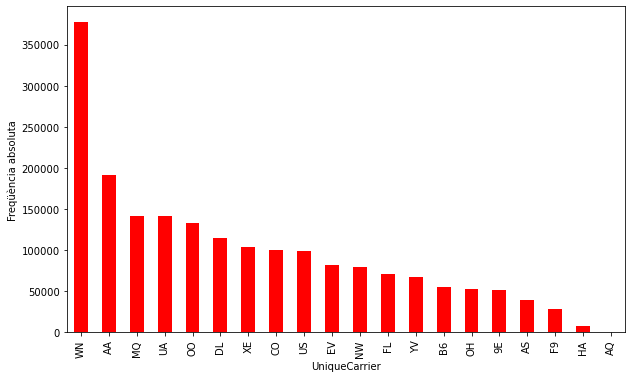

In [8]:
# Bar plot amb les aerolínies ordenades de major a mejor freqüència.
data_UC.plot.bar(y='Freq_abs', color='red', ylabel='Freqüència absoluta', legend=None, figsize=(10,6))
plt.savefig('Barres_FA_UC.png')
plt.show()

In [15]:
# Pie chart de la frequüencia absoluta de les aerolínies. 
# Es representen les 5 amb major freqüencia i tota la resta anomenada 'Altres'
Altres = int(data_UC[5:].sum())
Altres

951512

In [16]:
data_UC_2 = data_UC[:5]
data_UC_2.loc['Altres']=Altres
data_UC_2

C:\Users\DeividK3\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Freq_abs
UniqueCarrier,
WN,377602
AA,191865
MQ,141920
UA,141426
OO,132433
Altres,951512


<ipython-input-43-09d2bb265e98>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


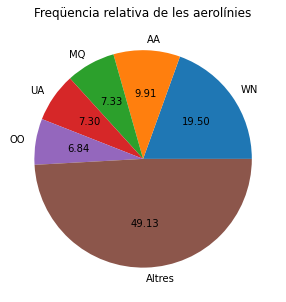

In [43]:
data_UC_2.plot(y = 'Freq_abs', kind='pie', autopct='%.2f', fontsize=10, 
                legend=None, figsize=(5, 5), title = 'Freqüencia relativa de les aerolínies')
plt.axes().set_ylabel('')
plt.savefig('PieChart_UC.jpg')
plt.show()

<span style='color:blue'> L'aerolinia més freqüent és WN que ocupa quasi el 20% dels vols. Les 15 aerolínies restants (Altres) representen el 50% dels vols. <span>

- Una variable numèrica (ArrDelay)

<span style='color:blue'>Per visualitzar una variable numèrica es pot utilitzar un histograma o un boxplot.</span>

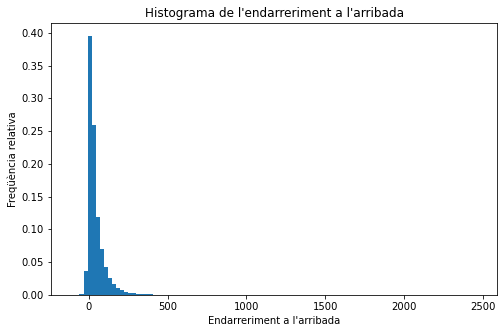

In [52]:
# Histograma de l'endarreriment a l'arribada
x = data_air['ArrDelay']

fig2, ax2 = plt.subplots(figsize=(8,5))

ax2.hist(x,weights=np.zeros_like(x) + 1. / x.size,bins=100)
ax2.set_xlabel("Endarreriment a l'arribada") 
ax2.set_ylabel('Freqüència relativa')
ax2.title.set_text("Histograma de l'endarreriment a l'arribada")
mpld3.save_html(fig2,"Hist_ArrDelay.html")
plt.show()

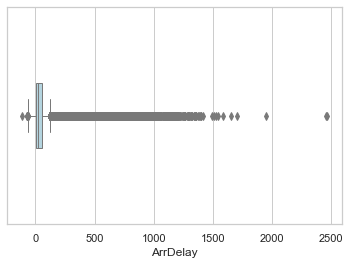

In [54]:
# Boxplot
sns.set(style="whitegrid")
ax3 = sns.boxplot(x=data_airlines["ArrDelay"], color='lightblue', fliersize=5,  orient='h', linewidth=1 , width=0.3)
plt.savefig('Boxplot_ArrDelay.jpg')

<span style='color:blue'>
       <p> El resum descriptiu indica que al voltant del 75% del vols (ordenats de manera ascendent) sofreixen endarreriments de menys d'una hora. </p>
    <p> Els gràfics indiquen que hi ha molts outliers o anomalies, provocant una distribució asimètrica (concentració de dades per l'esquerra).</p>
    </span>

- Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

<span style='color:blue'>
    <p> Per visualitzar una variable numèrica amb una categòrica es pot: </p>
    <p>- Representar tantes gràfiques de variables numèriques com categories hi ha (histogrames o boxplots)</p>
    <p>- Calcular un estadístic per a cada categoria (mitjana, màxim, mínim, etc.) i representar-ho amb un gràfic de barres</p>
    <p>En aquest cas es realitza un bar plot de les mitjanes de l'endarreriment a l'aterrar per aerolínia, en ordre descendent</p>
</span>

In [17]:
# 1) Es construeix el data frame que conté les mitjanes d'endarreriment a l'aterrar per a cada aerolínia i s'ordena
data_AD_UC = data_air[['ArrDelay','UniqueCarrier']].groupby('UniqueCarrier').mean().sort_values(by='ArrDelay',ascending=False)
data_AD_UC

,ArrDelay
UniqueCarrier,
YV,55.287049
B6,55.088739
OH,51.016968
XE,50.181217
UA,47.784399
EV,47.554255
9E,46.936493
AA,46.561553
OO,45.370587


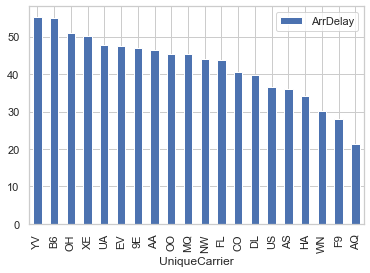

In [57]:
# 2) Es grafica el nou dataframe
data_AD_UC.plot.bar()
plt.savefig('Bar_UC_ArrDelay.jpg')
plt.show()

<span style='color:blue'>
    <p>De mitja, l'aerolínia YV és la que més endarreriments a l'arribada sofreix, i AQ la que menys</p>
    <p>La mitja d'endarreriment a l'arribada es troba entre 20 i 60 minuts</p>
</span>

- Dues variables numèriques (ArrDelay i DepDelay)

<span style='color:blue'>
    <p>Per visualitzar dues variables numèriques es pot utilitzar un diagrama de punts (scatter plot). </p> 
    <p>El parell de variables ArrDelay i DepDelay de cada observació formen una coordenada que es projecta al 
     gràfic. La distribució dels punts indica com de disperses es troben  les dades i si existeix correlació d'algun tipus</p>
</span>

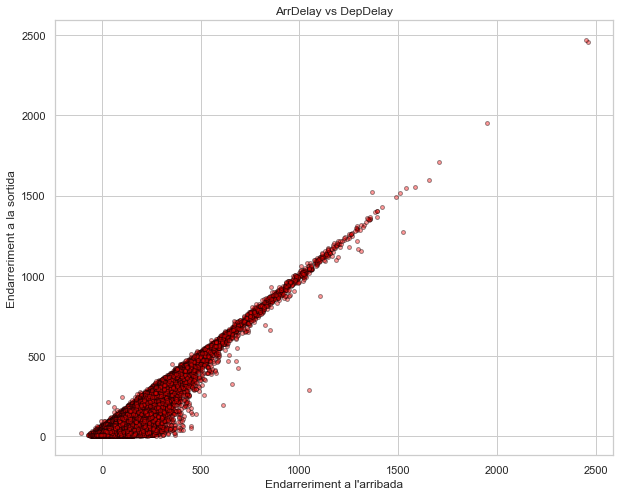

In [60]:
x = data_air['ArrDelay']
y = data_air['DepDelay']
colors = 'Red'
area = np.pi*5

# Plot
plt.figure(figsize=(10,8))
plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')
plt.title("ArrDelay vs DepDelay")
plt.xlabel("Endarreriment a l'arribada")
plt.ylabel("Endarreriment a la sortida")
plt.savefig('ArrDelay_vs_DepDelay.jpg')
plt.show()

<span style='color:blue'>
L'endarreriment a l'arribada i a la sortida estan correlacionants positivament. Això té sentit ja que quant més s'endarrereix la sortida més ho farà a l'arribada.
</span>

- Tres variables (ArrDelay, DepDelay i UniqueCarrier)

<span style='color:blue'>
    <p> Per visualitzar aquestes variables es pot: </p>
    <p>- Calcular un estadístic per a cada categoria (mitjana, màxim, mínim, etc.) de les dues variables numèriques i representar-ho amb un gràfic de barres</p>
    <p>- Representar un diagrama de punts (scatter plot) agrupant-los per categories (punts de diferents colors)</p>
    <p> Com que 'UniqueCarrier' té moltes categories, no és aconsellable la segona opció.</p>
</span>

In [18]:
# 1) Es construeix el data frame que conté les mitjanes d'endarreriment a la sortida per a cada aerolínia i s'ordena
# (El dataframe de l'arribada ja havia estat creat, data_AD_UC)
data_DD_UC = data_air[['DepDelay','UniqueCarrier']].groupby('UniqueCarrier').mean().sort_values(by='DepDelay',ascending=False)
data_DD_UC

,DepDelay
UniqueCarrier,
YV,55.352514
B6,54.935294
XE,49.963004
UA,49.903842
OH,48.913980
EV,48.264524
9E,47.350695
AA,46.395542
OO,44.698733


In [19]:
# 2) S'uneixen les dues taules
data_D_UC = data_AD_UC.merge(data_DD_UC,right_index=True,left_index=True)
data_D_UC

,ArrDelay,DepDelay
UniqueCarrier,,
YV,55.287049,55.352514
B6,55.088739,54.935294
OH,51.016968,48.913980
XE,50.181217,49.963004
UA,47.784399,49.903842
EV,47.554255,48.264524
9E,46.936493,47.350695
AA,46.561553,46.395542
OO,45.370587,44.698733


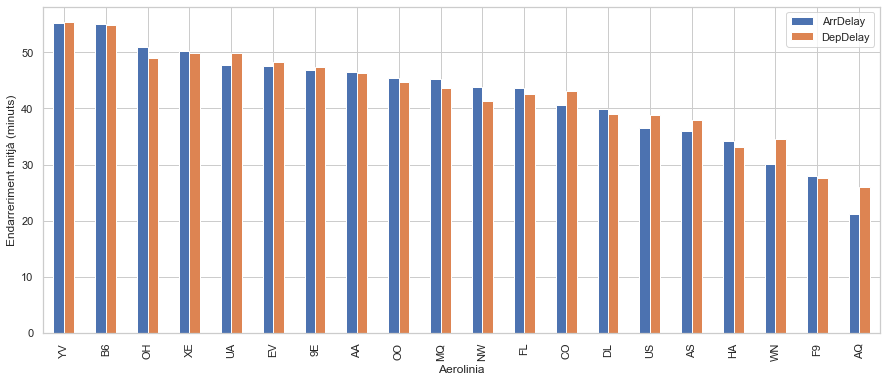

In [63]:
# 3) Es representa el gràfic
data_D_UC.plot.bar(figsize=(15,6),xlabel='Aerolinia', ylabel='Endarreriment mitjà (minuts)')
plt.savefig('AD_DD_UC.jpg')
plt.show()

<span style='color:blue'>
    <p> YV és l'aerolinia que acumula més endarreriments de mitja en les sortides i arribades, i AQ la que menys </p>
    <p> En la meitat dels casos, l'endarreriment mitjà en les sortides supera el de les arribades. </p>
</span>

- Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

<span style='color:blue'>
    <p>Per visualitzar aquestes variables es pot:</p>
    <p>- Calcular un estadístic per a cada categoria (mitjana, màxim, mínim, etc.) de les tres variables numèriques i representar-ho amb un gràfic de barres per categoria</p>
    <p>- Realitzar un gràfic de matriu de correlacions de les tres numèriques per a cada categoria</p>
    <p>- Representar un diagrama de punts en tres dimensions agrupant-los per categories (punts de diferents colors)</p>
    <p>Com que 'UniqueCarrier' té moltes categories, no és aconsellable la segona opció ni la tercera opció.</p>
</span>

In [20]:
# 1) Es construeix el data frame que conté les mitjanes de la durada del vol per a cada aerolínia i s'ordena
data_AT_UC = data_air[['AirTime','UniqueCarrier']].groupby('UniqueCarrier').mean().sort_values(by='AirTime',ascending=False)
data_AT_UC

,AirTime
UniqueCarrier,
CO,165.511486
B6,150.179845
AA,144.382547
UA,143.959391
US,132.149908
DL,132.078995
AS,129.628172
F9,122.229875
NW,115.856424


In [21]:
# 2) S'uneixen les taules les dues taules
data_T_UC = data_D_UC.merge(data_AT_UC,right_index=True,left_index=True)
data_T_UC

,ArrDelay,DepDelay,AirTime
UniqueCarrier,,,
YV,55.287049,55.352514,65.682098
B6,55.088739,54.935294,150.179845
OH,51.016968,48.913980,82.982289
XE,50.181217,49.963004,90.891737
UA,47.784399,49.903842,143.959391
EV,47.554255,48.264524,72.291749
9E,46.936493,47.350695,72.970389
AA,46.561553,46.395542,144.382547
OO,45.370587,44.698733,71.176871


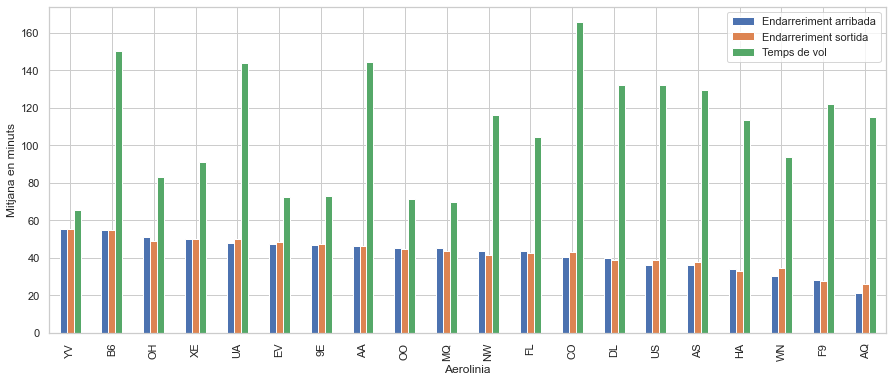

In [66]:
# 3) Es representa el gràfic
data_T_UC.plot.bar(figsize=(15,6),xlabel='Aerolinia', ylabel='Mitjana en minuts')
plt.legend(labels=['Endarreriment arribada','Endarreriment sortida','Temps de vol'])
plt.savefig('AD_DD_AT_UC.jpg')
plt.show()

<span style='color:blue'>
    <p>L'aerolínia amb més temps de vol mig és CO i la que menys és YV.</p>
    <p>A simple vista no sembla que hi hagi correlació entre el temps de vol i els endarreriments</p>
</span>

## <span style='color:blue'> 4) Creació de noves variables </span>

In [44]:
# Distancia en KM
data_air['Dist_km'] = round(data_air['Distance']*1.60934,2)

In [45]:
# Velocitat mitjana de l'avió (Km/h)
# Als vols cancel·lats o de temps = 0 se li asigna el valor 0
data_air['VelMitjana'] = np.where((data_air['AirTime'] == 0), 0, round(data_air['Dist_km']/(data_air['AirTime']/60),2))

In [46]:
# Les velocitats incoherents (menors a 100 o majors a 1500 km per hora) se'ls imputa el valor nan.
data_air['VelMitjana'] = np.where(((data_air['VelMitjana'] > 0) & (data_air['VelMitjana'] < 100)) | (data_air['VelMitjana'] > 1500), np.nan, data_air['VelMitjana'])

In [47]:
data_air['VelMitjana'].describe().round(3)

count    1928228.000
mean         638.511
std          122.067
min            0.000
25%          566.260
50%          649.880
75%          721.220
max         1489.780
Name: VelMitjana, dtype: float64

In [48]:
# L'avió ha arribat tard?
# Es considera que un avió arriba tard si aterra 5 minuts més tard de l'hora prevista.
# Es treballa amb la variable ArrDelay
data_air['Tard_Arr'] = np.where(data_air['ArrDelay']<=5, 'No', 'Yes')

In [49]:
# S'utilitza la variable CRSDepTime per crear una nova variable que indica si el vol programat surt de matí (de 4:01 a 12:00), 
# de tarda (de 12:00 a 20:00) o de nit (de 20:01 a 4:00)
data_air['Sortida'] = np.where((data_air['CRSDepTime'] > 1200) & (data_air['CRSDepTime'] <= 2000), 'Tarda',
                               np.where((data_air['CRSDepTime'] > 400) & (data_air['CRSDepTime'] <= 1200), 'Mati', 'Nit'))

In [50]:
# Visualització del dataframe amb les noves variables
data_air

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Dist_km,VelMitjana,Tard_Arr,Sortida
ID,,,,,,,,,,,,,,,,,,,,
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,116.0,-14.0,8.0,IAD,TPA,810,1303.57,674.26,No,Tarda
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,113.0,2.0,19.0,IAD,TPA,810,1303.57,692.16,No,Mati
2,2008,1,3,4,628.0,620,804.0,750,WN,448,76.0,14.0,8.0,IND,BWI,515,828.81,654.32,Yes,Mati
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,77.0,34.0,34.0,IND,BWI,515,828.81,645.83,Yes,Tarda
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,87.0,11.0,25.0,IND,JAX,688,1107.23,763.61,Yes,Tarda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,120.0,25.0,30.0,MSP,ATL,906,1458.06,729.03,Yes,Tarda
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,78.0,75.0,57.0,RIC,ATL,481,774.09,595.45,Yes,Mati
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,122.0,99.0,80.0,ATL,IAH,689,1108.84,545.33,Yes,Mati


- Taula de les aerolínies amb més endarreriments acumulats

In [51]:
# Es crea una nova base de dades filtrant les observacions que tenen endarreriment a l'arribada (Tard_Arr = "Yes")
data_air_tard = data_air[data_air['Tard_Arr']=='Yes'] 

In [52]:
# Endarreriments acumulats per aerolínia:
data_end = data_air_tard[['UniqueCarrier','Tard_Arr']].groupby(['UniqueCarrier']).count()
data_end

,Tard_Arr
UniqueCarrier,
9E,43110
AA,159179
AQ,566
AS,30850
B6,44771
CO,74576
DL,91824
EV,69421
F9,22711


In [53]:
# Les 5 aerolínies amb més endarreriments:
data_end.sort_values(by='Tard_Arr',ascending=False)[:5]

,Tard_Arr
UniqueCarrier,
WN,280942
AA,159179
MQ,120020
UA,114152
OO,111368


- Quins són els vols més llargs? I els més endarrerits?

In [54]:
# Com que hi ha números de vol que comparteixen el mateix recorregut, els vols més llargs serien tots aquells que 
# tinguessin la distancia màxima. Per això es decideix trobar els 5 recorreguts més llargs i assignar-los un
# dels múltiples vols que hi ha.

# Es crea una taula amb el número de vol, l'origen, el destí i la distància entre ambdós llocs
# Com que hi ha vols que tenen el mateix recorregut però invertint els origens i destins, s'agafa un dels dos possibles
# i se li assigna un número de vol corresponent
data_v_ll = data_air[['FlightNum','Origin','Dest','Distance']].groupby(['Distance']).first().reset_index()
data_v_ll.sort_values(by=['Distance'],ascending=False)[:5]

,Distance,FlightNum,Origin,Dest
1406,4962,15,EWR,HNL
1405,4502,850,HNL,ATL
1404,4243,1,ORD,HNL
1403,4213,3,KOA,ORD
1402,4184,3,ORD,OGG


In [55]:
# Els 5 vols més endarrerits (respecte l'aterratge, en minuts):
data_air[['FlightNum','ArrDelay']].sort_values(by='ArrDelay',ascending=False)[:5]

,FlightNum,ArrDelay
ID,,
1018798,808,2461.0
2235378,1699,2453.0
2832617,1107,1951.0
3387883,3538,1707.0
6857047,357,1655.0


- Altres questions:

In [56]:
# Moment del dia amb més sortides d'avions
data_md = data_air[['Year','Sortida']].groupby(['Sortida']).count().sort_values(by = ['Year'], ascending=False)
data_md = data_md.rename(columns={'Year' : 'Count'}) 
data_md

,Count
Sortida,
Tarda,1169085
Mati,535172
Nit,224114


In [57]:
# Els 5 dies amb més sortides de vols durant l'any 2008
data_5d = data_air[['Year','Month','DayofMonth']].groupby(['Month','DayofMonth']).count()
data_5d.sort_values(by = ['Year'], ascending=False)[:5]

Year
Month DayofMonth       
1     2           10848
12    22          10611
      23          10504
      1           10322
      21           9904

 <span style="color:blue">Els dies amb més vols coincideixen amb les vacances d'hivern.</span>

In [58]:
# Els dos mesos amb més endarreriments per vol (freqüència relativa)

## 1) Es calcula la freqüència absoluta de vols per mes
freq_vol_mes = data_air[['Year','Month']].groupby(['Month']).count()
freq_vol_mes = freq_vol_mes.rename(columns={'Year' : 'Freq_abs'})
freq_vol_mes

,Freq_abs
Month,
1,182915
10,103181
11,105148
12,201508
2,188625
3,200116
4,154783
5,152711
6,199888


In [59]:
## 2) Es calcula la freqüència absoluta de vols endarrerits (més de 5 minuts a l'aterrar) per mes
freq_vol_end = data_air_tard[['Year','Month']].groupby(['Month']).count()
freq_vol_end = freq_vol_end.rename(columns={'Year' : 'Freq_abs_end'})
freq_vol_end

,Freq_abs_end
Month,
1,149877
10,77144
11,81457
12,169601
2,157552
3,163874
4,124866
5,121751
6,167766


In [60]:
## 3) Es calcula la freqüència relativa d'endarreriments per mes
data_mend = pd.concat([freq_vol_end, freq_vol_mes], axis=1)
data_mend['Freq_rel_end']=data_mend['Freq_abs_end']/data_mend['Freq_abs']
data_mend

,Freq_abs_end,Freq_abs,Freq_rel_end
Month,,,
1,149877,182915,0.819381
10,77144,103181,0.747657
11,81457,105148,0.774689
12,169601,201508,0.841659
2,157552,188625,0.835266
3,163874,200116,0.818895
4,124866,154783,0.806716
5,121751,152711,0.797264
6,167766,199888,0.839300


In [61]:
## 4) S'ordena per la freqüencia relativa d'endarreriment de major a menor i s'agafen les dues primeres observacions 
data_mend.sort_values(by = ['Freq_rel_end'], ascending=False)[:2]

,Freq_abs_end,Freq_abs,Freq_rel_end
Month,,,
12,169601,201508,0.841659
6,167766,199888,0.839300


<span style='color:blue'>Els mesos amb més endarreriments relatius són juny i dessembre, que són els mesos de començament de vacances.</span>

In [62]:
# Els 3 primers origens amb més endarreriments
data_o_end = data_air_tard[['Year','Origin']].groupby(['Origin']).count()
data_o_end = data_o_end.rename(columns={'Year' : 'Endarreriments'}) 
data_o_end.sort_values(by='Endarreriments',ascending=False)[0:3]

,Endarreriments
Origin,
ATL,110398
ORD,106686
DFW,78927


## <span style='color:blue'> 5) Gràfics amb les noves variables </span>

__Diagrama de punts dels endarreriments a l'arribada vs endarreriments a la sortida, agrupats per moment de sortida__

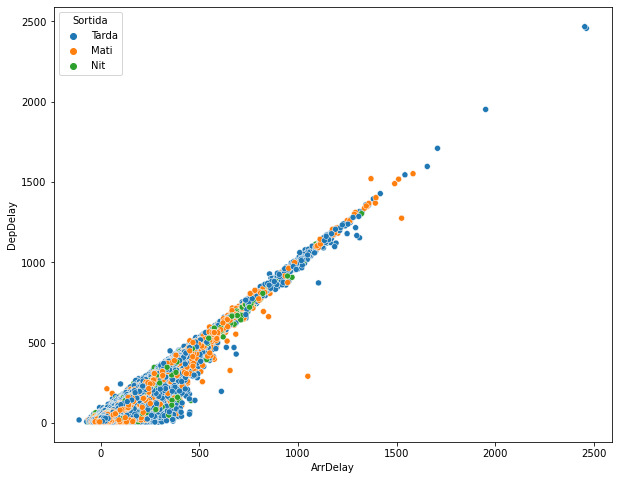

In [63]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_air, x="ArrDelay", y="DepDelay", hue="Sortida")
plt.show()

<span style='color:blue'> 
    <p> El gràfic no mostra amb claretat si la variable 'Sortida' discrimina l'endarreriment. </p>
    <p> Sembla ser que per la Tarda hi ha els endarreriments més llargs. </p>
</span>

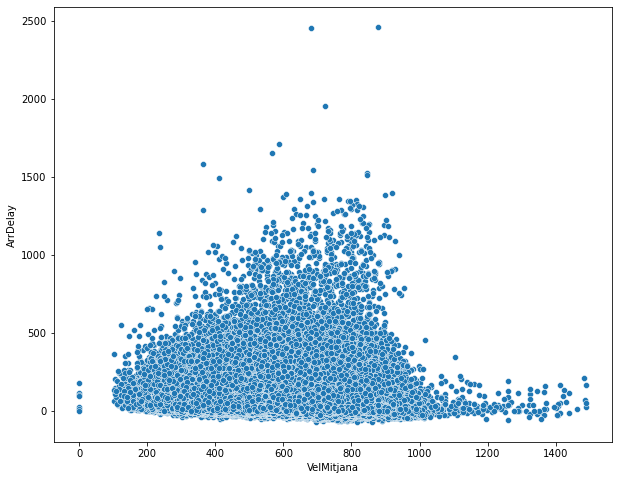

In [67]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_air, x="VelMitjana", y="ArrDelay")
plt.show()

<span style=color:blue> 
    <p> A simple vista sembla que no hi ha molta correlació lineal entre la velocitat mitjana i l'endarreriment </p>
</span>

## Exercici 3
__Exporta el data set net i amb les noves columnes a Excel.__

<span style='color:blue'>
    <br>Com que l'arxiu és massa gran, es decideix exportar-lo a csv.</br>
</span>

In [98]:
data_air.to_csv('Vols_endarrerits_2.csv')